In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/amous/Desktop/dataScience/top_hier_bts_overall_d1_10000_chiffre.csv')

In [2]:
for i in data.columns:
    print(i)

Unnamed: 0
date_debut
mdn
imsi
imei
idnt_contrat
idnt_client_crm
idnt_compte_facturation
idnt_profil
desc_profil
sous_profil
gamme
marche
segment
type_jour
princp_data_vol_jour_octets
princp_data_vol_jour_cell
princp_data_vol_jour_secteur
princp_data_vol_jour_bts
princp_data_vol_jour_ville
princp_data_vol_jour_region
princp_data_vol_jour_province
princp_data_vol_soir_octets
princp_data_vol_soir_cell
princp_data_vol_soir_secteur
princp_data_vol_soir_bts
princp_data_vol_soir_ville
princp_data_vol_soir_region
princp_data_vol_soir_province
princp_data_vol_nuit_octets
princp_data_vol_nuit_cell
princp_data_vol_nuit_secteur
princp_data_vol_nuit_bts
princp_data_vol_nuit_ville
princp_data_vol_nuit_region
princp_data_vol_nuit_province
princp_data_vol_total_octets
princp_data_vol_total_cell
princp_data_vol_total_secteur
princp_data_vol_total_bts
princp_data_vol_total_ville
princp_data_vol_total_region
princp_data_vol_total_province
princp_voix_dur_jour_minutes
princp_voix_dur_jour_cell
princp_voi

In [3]:
data = data.drop('date_debut', axis=1)  # Features (phone number attributes)
data = data.drop('imsi', axis=1)  # Features (phone number attributes)
data = data.drop('idnt_contrat', axis=1)  # Features (phone number attributes)
data = data.drop('sous_profil', axis=1)  # Features (phone number attributes)
data = data.drop('gamme', axis=1)  # Features (phone number attributes)
data = data.drop('segment', axis=1)  # Features (phone number attributes)
data = data.drop('type_jour', axis=1)  # Features (phone number attributes)
data = data.drop('idnt_date', axis=1)  # Features (phone number attributes)

In [4]:
data = data.drop('imei', axis=1)  # Features (phone number attributes)

In [5]:
for i in data.columns:
    print(i)

Unnamed: 0
mdn
idnt_client_crm
idnt_compte_facturation
idnt_profil
desc_profil
marche
princp_data_vol_jour_octets
princp_data_vol_jour_cell
princp_data_vol_jour_secteur
princp_data_vol_jour_bts
princp_data_vol_jour_ville
princp_data_vol_jour_region
princp_data_vol_jour_province
princp_data_vol_soir_octets
princp_data_vol_soir_cell
princp_data_vol_soir_secteur
princp_data_vol_soir_bts
princp_data_vol_soir_ville
princp_data_vol_soir_region
princp_data_vol_soir_province
princp_data_vol_nuit_octets
princp_data_vol_nuit_cell
princp_data_vol_nuit_secteur
princp_data_vol_nuit_bts
princp_data_vol_nuit_ville
princp_data_vol_nuit_region
princp_data_vol_nuit_province
princp_data_vol_total_octets
princp_data_vol_total_cell
princp_data_vol_total_secteur
princp_data_vol_total_bts
princp_data_vol_total_ville
princp_data_vol_total_region
princp_data_vol_total_province
princp_voix_dur_jour_minutes
princp_voix_dur_jour_cell
princp_voix_dur_jour_secteur
princp_voix_dur_jour_bts
princp_voix_dur_jour_ville

In [6]:
data.dtypes

Unnamed: 0                   int64
mdn                         object
idnt_client_crm             object
idnt_compte_facturation     object
idnt_profil                 object
                            ...   
princp_actv_ville           object
princp_actv_region          object
princp_actv_province        object
princp_vol_actv            float64
princp_vol_actv_unit        object
Length: 71, dtype: object

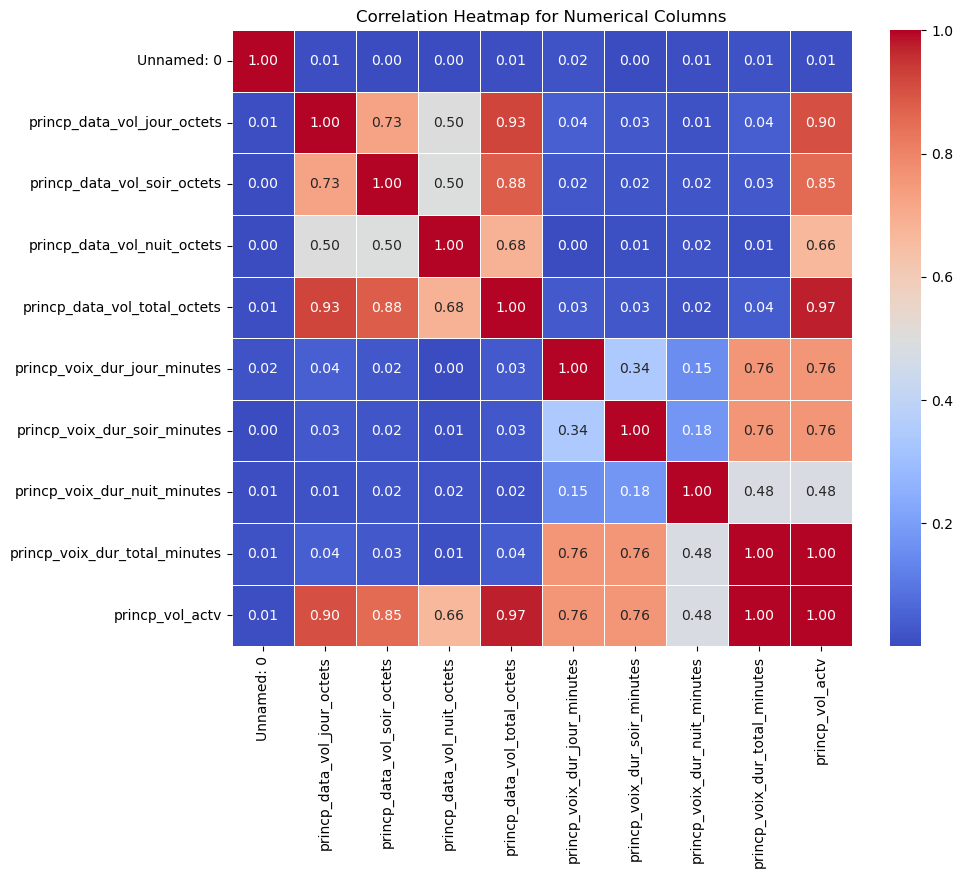

princp_data_vol_jour_octets - princp_data_vol_soir_octets: 0.73
princp_data_vol_jour_octets - princp_data_vol_total_octets: 0.93
princp_data_vol_jour_octets - princp_vol_actv: 0.90
princp_data_vol_soir_octets - princp_data_vol_jour_octets: 0.73
princp_data_vol_soir_octets - princp_data_vol_total_octets: 0.88
princp_data_vol_soir_octets - princp_vol_actv: 0.85
princp_data_vol_total_octets - princp_data_vol_jour_octets: 0.93
princp_data_vol_total_octets - princp_data_vol_soir_octets: 0.88
princp_data_vol_total_octets - princp_vol_actv: 0.97
princp_voix_dur_jour_minutes - princp_voix_dur_total_minutes: 0.76
princp_voix_dur_jour_minutes - princp_vol_actv: 0.76
princp_voix_dur_soir_minutes - princp_voix_dur_total_minutes: 0.76
princp_voix_dur_soir_minutes - princp_vol_actv: 0.76
princp_voix_dur_total_minutes - princp_voix_dur_jour_minutes: 0.76
princp_voix_dur_total_minutes - princp_voix_dur_soir_minutes: 0.76
princp_voix_dur_total_minutes - princp_vol_actv: 1.00
princp_vol_actv - princp_da

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include='number')

# Calculate Pearson correlation
correlation_numerical = numerical_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

# Define the threshold correlation value
my_coor = 0.7

# Find column pairs with correlation greater than my_coor
correlation_pairs = []
for col1 in correlation_numerical.columns:
    for col2 in correlation_numerical.columns:
        if col1 != col2 and abs(correlation_numerical.loc[col1, col2]) > my_coor:
            correlation_pairs.append((col1, col2, correlation_numerical.loc[col1, col2]))

# Print the column pairs with correlation greater than my_coor
for col1, col2, corr in correlation_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")


In [19]:
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

df_cat = pd.DataFrame(data = data.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['mdn',
 'idnt_client_crm',
 'idnt_compte_facturation',
 'idnt_profil',
 'desc_profil',
 'marche',
 'princp_data_vol_jour_cell',
 'princp_data_vol_jour_secteur',
 'princp_data_vol_jour_bts',
 'princp_data_vol_jour_ville',
 'princp_data_vol_jour_region',
 'princp_data_vol_jour_province',
 'princp_data_vol_soir_cell',
 'princp_data_vol_soir_secteur',
 'princp_data_vol_soir_bts',
 'princp_data_vol_soir_ville',
 'princp_data_vol_soir_region',
 'princp_data_vol_soir_province',
 'princp_data_vol_nuit_cell',
 'princp_data_vol_nuit_secteur',
 'princp_data_vol_nuit_bts',
 'princp_data_vol_nuit_ville',
 'princp_data_vol_nuit_region',
 'princp_data_vol_nuit_province',
 'princp_data_vol_total_cell',
 'princp_data_vol_total_secteur',
 'princp_data_vol_total_bts',
 'princp_data_vol_total_ville',
 'princp_data_vol_total_region',
 'princp_data_vol_total_province',
 'princp_voix_dur_jour_cell',
 'princp_voix_dur_jour_secteur',
 'princp_voix_dur_jour_bts',
 'princp_voix_dur_jour_ville',
 'princp_voix_du

In [21]:
df_cat = data[cat_var]
df_cat.head()

,mdn,idnt_client_crm,idnt_compte_facturation,idnt_profil,desc_profil,marche,princp_data_vol_jour_cell,princp_data_vol_jour_secteur,princp_data_vol_jour_bts,princp_data_vol_jour_ville,...,princp_voix_dur_total_ville,princp_voix_dur_total_region,princp_voix_dur_total_province,princp_actv_total_cell,princp_actv_total_secteur,princp_actv_total_bts,princp_actv_ville,princp_actv_region,princp_actv_province,princp_vol_actv_unit
0,479e5ba06010b11c6618fff004e01a99,2c1d4c8dc3926c2f36e60b51f39dd41d,5a446deabe79d6966125b528b16afa97,5ea6242e1428266e5b4a2d4ecd764388,TicTac 4G,Mobile Prepaid,6040204D1018A0D02,CAS-1877_L-2,CAS-1877,CASABLANCA,...,* Value not available,* Value not available,* Value not available,6040204D1018A0D02,CAS-1877_L-2,CAS-1877,CASABLANCA,Grand Casablanca-Settat,Casablanca,bytes
1,8dcd4c612b90296c577a7bce1cd475fd,b7f6cee4d32e5d7408a8d55cfdb27b08,f3e843f0a243905b19b12d91afb1a81c,5ea6242e1428266e5b4a2d4ecd764388,TicTac 4G,Mobile Prepaid,6040204960187D205,CAS-1306_L-5,CAS-1306,CASABLANCA,...,* Value not available,* Value not available,* Value not available,6040204960187D205,CAS-1306_L-5,CAS-1306,CASABLANCA,Grand Casablanca-Settat,Casablanca,bytes
2,0adf7cb1e06a2572a658ef4b5d9b0861,f198a2ee467012e0366014da12557af9,e7d49ee7e0bd2267e4e5bdcb1452ccf4,005e6278fb49751ef475a251adcde5c4,TicTac,Mobile Prepaid,6040204CF03CCAC01,OAB-1004_L-1,OAB-1004,LAGHNIMYINE,...,LAGHNIMYINE,Grand Casablanca-Settat,Berrechid,604020123156969,OAB-1004_U-93,OAB-1004,LAGHNIMYINE,Grand Casablanca-Settat,Berrechid,minutes
3,24316ae30425c7c0e29d904b291361c6,078c3bda9e5a8201c8f536acad01633b,fedb1808c2895c6159d68610f6a41611,5ea6242e1428266e5b4a2d4ecd764388,TicTac 4G,Mobile Prepaid,* Key not found,* Key not found,* Key not found,* Key not found,...,BNI YAKHLEF,Grand Casablanca-Settat,Mohammadia,604020117302254,MOH-1054_U-1,MOH-1054,BNI YAKHLEF,Grand Casablanca-Settat,Mohammadia,minutes
4,d588b29003e6bd796ca86dde42331d3a,dd07082998c00a3bd6b0f907e490fa05,90a0acd42594912f948192d04af6f8e4,9d9266b961c13eb73c0c1193ad0c8047,Idar Duo 249 dhs,Home,60402049501DCA266,MOH-1018_L-M2,MOH-1018,MOHAMMEDIA,...,* Value not available,* Value not available,* Value not available,60402049501DCA266,MOH-1018_L-M2,MOH-1018,MOHAMMEDIA,Grand Casablanca-Settat,Mohammadia,bytes


In [22]:
## Let us split this list into two parts
cat_var1 = ('mdn',
 'idnt_client_crm',
 'idnt_compte_facturation',
 'idnt_profil',
 'desc_profil',
 'marche',
 'princp_data_vol_jour_cell',
 'princp_data_vol_jour_secteur',
 'princp_data_vol_jour_bts',
 'princp_data_vol_jour_ville',
 'princp_data_vol_jour_region',
 'princp_data_vol_jour_province',
 'princp_data_vol_soir_cell',
 'princp_data_vol_soir_secteur',
 'princp_data_vol_soir_bts',
 'princp_data_vol_soir_ville',
 'princp_data_vol_soir_region',
 'princp_data_vol_soir_province',
 'princp_data_vol_nuit_cell',
 'princp_data_vol_nuit_secteur',
 'princp_data_vol_nuit_bts',
 'princp_data_vol_nuit_ville',
 'princp_data_vol_nuit_region',
 'princp_data_vol_nuit_province',
 'princp_data_vol_total_cell',
 'princp_data_vol_total_secteur',
 'princp_data_vol_total_bts',
 'princp_data_vol_total_ville',
 'princp_data_vol_total_region',
 'princp_data_vol_total_province',
 'princp_voix_dur_jour_cell',
 'princp_voix_dur_jour_secteur',
 'princp_voix_dur_jour_bts',
 'princp_voix_dur_jour_ville',
 'princp_voix_dur_jour_region',
 'princp_voix_dur_jour_province',
 'princp_voix_dur_soir_cell',
 'princp_voix_dur_soir_secteur',
 'princp_voix_dur_soir_bts',
 'princp_voix_dur_soir_ville',
 'princp_voix_dur_soir_region',
 'princp_voix_dur_soir_province',
 'princp_voix_dur_nuit_cell',
 'princp_voix_dur_nuit_secteur',
 'princp_voix_dur_nuit_bts',
 'princp_voix_dur_nuit_ville',
 'princp_voix_dur_nuit_region',
 'princp_voix_dur_nuit_province',
 'princp_voix_dur_total_cell',
 'princp_voix_dur_total_secteur',
 'princp_voix_dur_total_bts',
 'princp_voix_dur_total_ville',
 'princp_voix_dur_total_region',
 'princp_voix_dur_total_province',
 'princp_actv_total_cell',
 'princp_actv_total_secteur',
 'princp_actv_total_bts',
 'princp_actv_ville',
 'princp_actv_region',
 'princp_actv_province',
 'princp_vol_actv_unit')
cat_var2 = ('mdn',
 'idnt_client_crm',
 'idnt_compte_facturation',
 'idnt_profil',
 'desc_profil',
 'marche',
 'princp_data_vol_jour_cell',
 'princp_data_vol_jour_secteur',
 'princp_data_vol_jour_bts',
 'princp_data_vol_jour_ville',
 'princp_data_vol_jour_region',
 'princp_data_vol_jour_province',
 'princp_data_vol_soir_cell',
 'princp_data_vol_soir_secteur',
 'princp_data_vol_soir_bts',
 'princp_data_vol_soir_ville',
 'princp_data_vol_soir_region',
 'princp_data_vol_soir_province',
 'princp_data_vol_nuit_cell',
 'princp_data_vol_nuit_secteur',
 'princp_data_vol_nuit_bts',
 'princp_data_vol_nuit_ville',
 'princp_data_vol_nuit_region',
 'princp_data_vol_nuit_province',
 'princp_data_vol_total_cell',
 'princp_data_vol_total_secteur',
 'princp_data_vol_total_bts',
 'princp_data_vol_total_ville',
 'princp_data_vol_total_region',
 'princp_data_vol_total_province',
 'princp_voix_dur_jour_cell',
 'princp_voix_dur_jour_secteur',
 'princp_voix_dur_jour_bts',
 'princp_voix_dur_jour_ville',
 'princp_voix_dur_jour_region',
 'princp_voix_dur_jour_province',
 'princp_voix_dur_soir_cell',
 'princp_voix_dur_soir_secteur',
 'princp_voix_dur_soir_bts',
 'princp_voix_dur_soir_ville',
 'princp_voix_dur_soir_region',
 'princp_voix_dur_soir_province',
 'princp_voix_dur_nuit_cell',
 'princp_voix_dur_nuit_secteur',
 'princp_voix_dur_nuit_bts',
 'princp_voix_dur_nuit_ville',
 'princp_voix_dur_nuit_region',
 'princp_voix_dur_nuit_province',
 'princp_voix_dur_total_cell',
 'princp_voix_dur_total_secteur',
 'princp_voix_dur_total_bts',
 'princp_voix_dur_total_ville',
 'princp_voix_dur_total_region',
 'princp_voix_dur_total_province',
 'princp_actv_total_cell',
 'princp_actv_total_secteur',
 'princp_actv_total_bts',
 'princp_actv_ville',
 'princp_actv_region',
 'princp_actv_province',
 'princp_vol_actv_unit')

In [23]:
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [29]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))

C:\Users\amous\anaconda3\lib\site-packages\pandas\core\reshape\reshape.py:126: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


IndexError: index 1389541225 is out of bounds for axis 0 with size 1389465408

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
categorical_columns = data.select_dtypes(include='object')

# Define a function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

# Create an empty DataFrame to store the results
correlation_categorical = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        confusion_matrix = pd.crosstab(categorical_columns[col1].values, categorical_columns[col2].values)
        correlation_categorical.loc[col1, col2] = cramers_v(confusion_matrix)

# 'correlation_categorical' is now a DataFrame containing the correlation values


C:\Users\amous\anaconda3\lib\site-packages\pandas\core\reshape\reshape.py:126: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


IndexError: index 1410114101 is out of bounds for axis 0 with size 1410065408

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
categorical_columns = data.select_dtypes(include='object')

# Define a function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

# Define the number of most frequent categories to consider
top_categories = 10

# Create an empty DataFrame to store the results
correlation_categorical = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        top_categories_col1 = categorical_columns[col1].value_counts().nlargest(top_categories).index
        top_categories_col2 = categorical_columns[col2].value_counts().nlargest(top_categories).index
        filtered_data = data[data[col1].isin(top_categories_col1) & data[col2].isin(top_categories_col2)]
        
        if len(filtered_data) > 0:
            confusion_matrix = pd.crosstab(filtered_data[col1], filtered_data[col2])
            correlation_categorical.loc[col1, col2] = cramers_v(confusion_matrix)

# 'correlation_categorical' is now a DataFrame containing the correlation values


C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\22564314

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  r_corr = r - ((r - 1) ** 2) / (n - 1)
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:16: RuntimeWarni

C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))
C:\Users\amous\AppData\Local\Temp\ipykernel_10968\225643147.

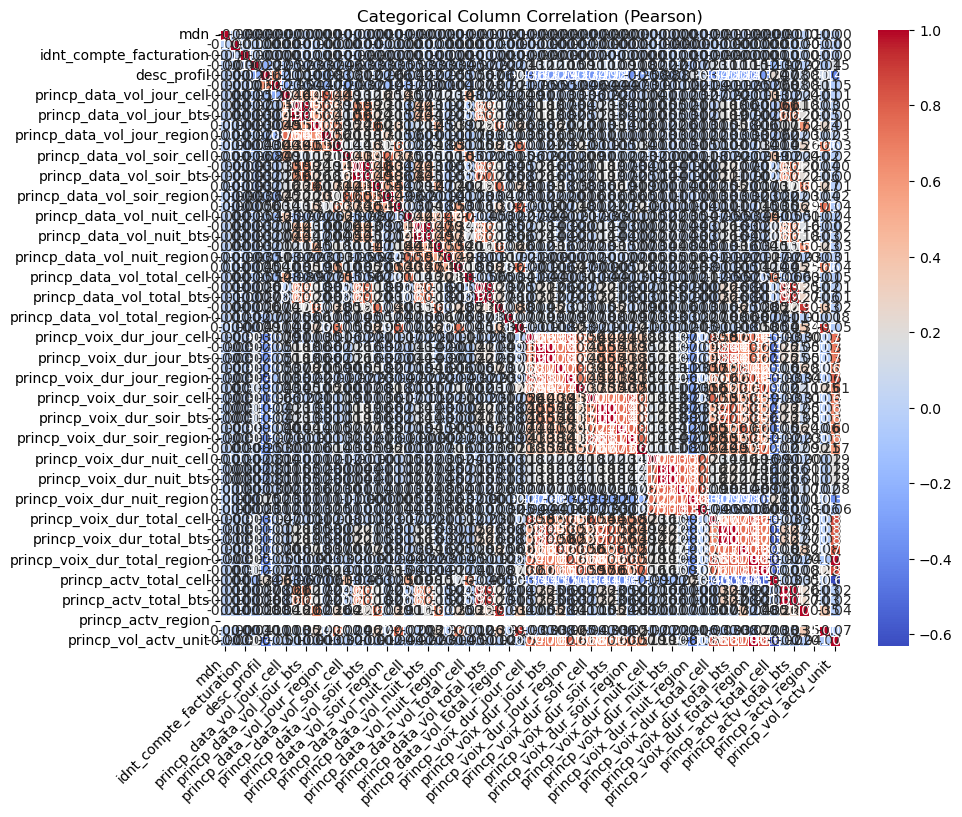

Column pairs with correlation greater than 0.7:
princp_data_vol_jour_cell - princp_data_vol_jour_region: 0.75
princp_data_vol_jour_secteur - princp_data_vol_jour_bts: 0.99
princp_data_vol_jour_bts - princp_data_vol_jour_secteur: 0.99
princp_data_vol_jour_region - princp_data_vol_jour_cell: 0.75
princp_data_vol_jour_province - princp_data_vol_total_province: 0.71
princp_data_vol_soir_cell - princp_data_vol_soir_region: 0.72
princp_data_vol_soir_secteur - princp_data_vol_soir_bts: 0.99
princp_data_vol_soir_bts - princp_data_vol_soir_secteur: 0.99
princp_data_vol_soir_bts - princp_data_vol_total_bts: 0.71
princp_data_vol_soir_ville - princp_data_vol_total_ville: 0.72
princp_data_vol_soir_region - princp_data_vol_soir_cell: 0.72
princp_data_vol_soir_province - princp_data_vol_total_province: 0.77
princp_data_vol_soir_province - princp_actv_province: 0.73
princp_data_vol_nuit_cell - princp_data_vol_nuit_region: 0.73
princp_data_vol_nuit_cell - princp_data_vol_total_cell: 0.71
princp_data_vo

In [7]:
import pandas as pd

# Assuming 'data' is your DataFrame with mixed columns (numerical and categorical)
# Step 1: Extract categorical columns into a separate DataFrame
data_cat = data.select_dtypes(include='object')

# Step 2: Convert categorical data to numerical using label encoding
data_cat_encoded = data_cat.apply(lambda x: x.astype('category').cat.codes)

# Step 3: Calculate the Pearson correlation for the numerical representation of categorical data
correlation_categorical = data_cat_encoded.corr()

# Step 4: Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_categorical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Categorical Column Correlation (Pearson)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 5: Find column pairs with correlation greater than a threshold (e.g., 0.7)
my_coor_categorical = 0.7

# Find column pairs with correlation greater than my_coor_categorical
correlation_pairs_categorical = []
for col1 in correlation_categorical.columns:
    for col2 in correlation_categorical.columns:
        if col1 != col2 and correlation_categorical.loc[col1, col2] > my_coor_categorical:
            correlation_pairs_categorical.append((col1, col2, correlation_categorical.loc[col1, col2]))

# Print the column pairs with correlation greater than my_coor_categorical
print("Column pairs with correlation greater than 0.7:")
for col1, col2, corr in correlation_pairs_categorical:
    print(f"{col1} - {col2}: {corr:.2f}")
